## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.


In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns

In [105]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


**Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)**
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Масштабируйте данные с помощью StandardScaler.

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_test.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [110]:
from sklearn.manifold import TSNE


In [206]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

**Постройте диаграмму рассеяния на этих данных.


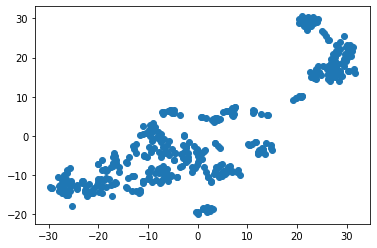

In [112]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.



In [222]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [223]:
train_labels = model.fit_predict(X_train_scaled)


In [224]:
model.inertia_

2820.5177072919746

In [225]:
train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

**Постройте еще раз диаграмму рассеяния на данных**, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


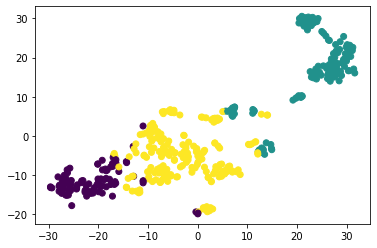

In [226]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)


In [227]:
a = pd.concat([pd.DataFrame(X_train['CRIM']), pd.DataFrame(y_train['price']), pd.DataFrame(train_labels)], axis=1)
a.columns = ['CRIM', 'price', 'cluster']


In [228]:
a

,CRIM,price,cluster
0,NaN,NaN,1.0
1,0.02731,21.6,2.0
2,NaN,NaN,0.0
3,0.03237,33.4,1.0
4,0.06905,36.2,2.0
...,...,...,...
499,0.17783,17.5,NaN
502,0.04527,20.6,NaN
503,0.06076,23.9,NaN
504,0.10959,22.0,NaN


**Вычислите средние значения price и CRIM в разных кластерах.


In [229]:
c = pd.pivot_table(a, values=['CRIM', 'price'], index=['cluster'],  aggfunc=np.mean)
c

,CRIM,price
cluster,,
0.0,2.859222,24.046575
1.0,1.481395,24.070000
2.0,1.718656,24.708974


можно также посмотреть корреляцию средних цен с криминальностью кластера

In [235]:
pd.DataFrame(np.corrcoef(c['CRIM'], c['price']))

,0,1
0,1.000000,-0.382973
1,-0.382973,1.000000


**+ посмотреть распределение целевой функции в зависимости от кластера**


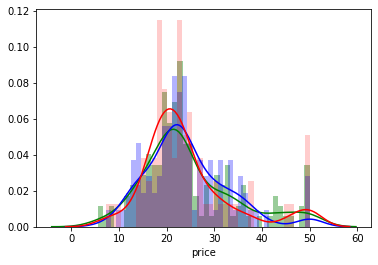

In [194]:
sns.distplot(a.loc[a['cluster'] == 2, 'price'], color='g', bins=40, hist_kws={'alpha': 0.4})
sns.distplot(a.loc[a['cluster'] == 1, 'price'], color='b', bins=40, hist_kws={'alpha': 0.3})
sns.distplot(a.loc[a['cluster'] == 0, 'price'], color='r', bins=40, hist_kws={'alpha': 0.2})

преимущества разбиения на три кластера неочевидны... В диаграмме рассеяния визуально можно наблюдать приблизительно 10 кластеров. Непонятны принципы по которым было выбрано 3 кластера: Inertia большая, сильно снижается при увеличении числа кластеров.

## * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [195]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [197]:
labels_test = model.predict(X_test_scaled)

In [198]:
b = pd.concat([pd.DataFrame(X_test['CRIM']), pd.DataFrame(y_test['price']), pd.DataFrame(labels_test)], axis=1)
b.columns = ['CRIM', 'price', 'cluster']


In [199]:
b

,CRIM,price,cluster
0,0.00632,24.0,2.0
1,NaN,NaN,0.0
2,0.02729,34.7,1.0
3,NaN,NaN,2.0
4,NaN,NaN,1.0
...,...,...,...
491,0.10574,13.6,NaN
496,0.28960,19.7,NaN
497,0.26838,18.3,NaN
500,0.22438,16.8,NaN


**Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [232]:
pd.pivot_table(b, values=['CRIM','price'], index=['cluster'],  aggfunc=np.mean)

,CRIM,price
cluster,,
0.0,0.251460,21.320000
1.0,0.188806,23.588889
2.0,0.244992,21.978571


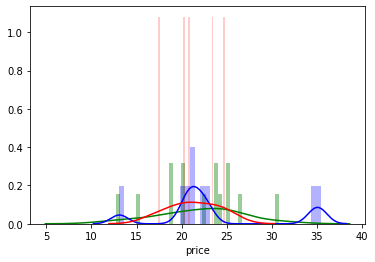

In [234]:
sns.distplot(b.loc[b['cluster'] == 2, 'price'], color='g', bins=40, hist_kws={'alpha': 0.4})
sns.distplot(b.loc[b['cluster'] == 1, 'price'], color='b', bins=40, hist_kws={'alpha': 0.3})
sns.distplot(b.loc[b['cluster'] == 0, 'price'], color='r', bins=40, hist_kws={'alpha': 0.2})

Вопрос сохраняется: зачем разбивать на три кластера, когда на тестовых данных распределение целевой функции в зависимости от кластера выглядит совершенно иначе